# Indexing and Slicing

*Estimated teaching time:* 30 min

*Estimated challenge time:* 30 min

*Key questions:*

  - "How can I access specific data within my data set?"
  - "How  can Python and Pandas help me to analyse my data?"
    
*Learning objectives:*

  - Describe what 0-based indexing is.
  - Manipulate and extract data using column headings and index locations.
  - Employ slicing to select sets of data from a DataFrame.
  - Employ label and integer-based indexing to select ranges of data in a dataframe.
  - Reassign values within subsets of a DataFrame.
  - Create a copy of a DataFrame.
  - "Query /select a subset of data using a set of criteria using the following operators: =, !=, >, <, >=, <=."
  - Locate subsets of data using masks.
  - Describe BOOLEAN objects in Python and manipulate data using BOOLEANs.

---

In this lesson, we will explore **ways to access different parts of the data** in a Pandas DataFrame using:

  - Indexing,
  - Slicing, and
  - Subsetting

# Indexing, Slicing and Subsetting


In this lesson, we will explore **ways to access different parts of the data** in a Pandas DataFrame using:

  - Indexing,
  - Slicing, and
  - Subsetting

## Ensure the Pandas package is installed

In [1]:
!pip install pandas matplotlib

## Loading our data

We will continue to use the surveys dataset that we worked with in the last lesson. Let's reopen and read in the data again:

In [2]:
# Make sure pandas is loaded
import pandas as pd

# Read in the survey CSV
surveys_df = pd.read_csv("surveys.csv")

## Indexing and Slicing in Python

We often want to work with subsets of a **DataFrame** object. There are
different ways to accomplish this including: using labels (column headings),
numeric ranges, or specific x,y index locations.

## Selecting data using Labels (Column Headings)

We use square brackets `[]` to select a subset of an Python object. For example,
we can select all data from a column named `species_id` from the `surveys_df`
DataFrame by name. There are two ways to do this:

In [3]:
# Method 1: select a 'subset' of the data using the column name
surveys_df['species_id'].head()

0    NL
1    NL
2    DM
3    DM
4    DM
Name: species_id, dtype: object

In [4]:
# Method 2: use the column name as an 'attribute'; gives the same output
surveys_df.species_id.head()

0    NL
1    NL
2    DM
3    DM
4    DM
Name: species_id, dtype: object

We can also create a new object that contains only the data within the
`species_id` column as follows:

In [5]:
# Creates an object, surveys_species, that only contains the `species_id` column
surveys_species = surveys_df['species_id']

We can pass a list of column names too, as an index to select columns in that
order. This is useful when we need to reorganize our data.

**NOTE:** If a column name is not contained in the DataFrame, an exception
(error) will be raised.

In [6]:
# Select the species and plot columns from the DataFrame
surveys_df[['species_id', 'site_id']].head()

,species_id,site_id
0,NL,2
1,NL,3
2,DM,2
3,DM,7
4,DM,3


What happens if you ask for a column that doesn't exist?

```python
surveys_df['speciess']
```

Outputs:

```python
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   2392             try:
-> 2393                 return self._engine.get_loc(key)
   2394             except KeyError:

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc (pandas/_libs/index.c:5239)()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc (pandas/_libs/index.c:5085)()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item (pandas/_libs/hashtable.c:20405)()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item (pandas/_libs/hashtable.c:20359)()

KeyError: 'speciess'

During handling of the above exception, another exception occurred:

KeyError                                  Traceback (most recent call last)
<ipython-input-7-7d65fa0158b8> in <module>()
      1 
      2 # What happens if you ask for a column that doesn't exist?
----> 3 surveys_df['speciess']
      4 

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/frame.py in __getitem__(self, key)
   2060             return self._getitem_multilevel(key)
   2061         else:
-> 2062             return self._getitem_column(key)
   2063 
   2064     def _getitem_column(self, key):

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/frame.py in _getitem_column(self, key)
   2067         # get column
   2068         if self.columns.is_unique:
-> 2069             return self._get_item_cache(key)
   2070 
   2071         # duplicate columns & possible reduce dimensionality

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/generic.py in _get_item_cache(self, item)
   1532         res = cache.get(item)
   1533         if res is None:
-> 1534             values = self._data.get(item)
   1535             res = self._box_item_values(item, values)
   1536             cache[item] = res

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/internals.py in get(self, item, fastpath)
   3588 
   3589             if not isnull(item):
-> 3590                 loc = self.items.get_loc(item)
   3591             else:
   3592                 indexer = np.arange(len(self.items))[isnull(self.items)]

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   2393                 return self._engine.get_loc(key)
   2394             except KeyError:
-> 2395                 return self._engine.get_loc(self._maybe_cast_indexer(key))
   2396 
   2397         indexer = self.get_indexer([key], method=method, tolerance=tolerance)

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc (pandas/_libs/index.c:5239)()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc (pandas/_libs/index.c:5085)()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item (pandas/_libs/hashtable.c:20405)()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item (pandas/_libs/hashtable.c:20359)()

KeyError: 'speciess'
```

Python tells us what type of error it is in the traceback, at the bottom it says `KeyError: 'speciess'` which means that `speciess` is not a column name (or Key in the related python data type dictionary).

In [7]:
# What happens when you flip the order?
surveys_df[['site_id', 'species_id']].head()

,site_id,species_id
0,2,NL
1,3,NL
2,2,DM
3,7,DM
4,3,DM


## Extracting Range based Subsets: Slicing

**REMINDER**: Python Uses 0-based Indexing

Let's remind ourselves that Python uses 0-based
indexing. This means that the first element in an object is located at position
0. This is different from other tools like R and Matlab that index elements
within objects starting at 1.

In [8]:
# Create a list of numbers:
a = [1, 2, 3, 4, 5]

![indexing diagram](images/slicing-indexing.svg)
![slicing diagram](images/slicing-slicing.svg)

## Challenge - Extracting data

1. What value does the code **a[0]** return?

2. How about this: **a[5]**

3. In the example above, calling `a[5]` returns an error. Why is that?

4. What about **a[len(a)]** ?

## Solutions - Extracting data

In [9]:
a[0]

1

In [10]:
# Solution #2
# a[5]

#### Solution #2

In above example, the error says `list index out of range`. This means we don't have index 5 in our list. The maximum index for `a` is `4`, as indexing starts at `0`.

In [11]:
# Solution #3
# a[len(a)]

#### Solution - # 4 - Extracting data 
This also gives an error, because len(a) is `5` which is not the maximum index

## Slicing Subsets of Rows in Python

Slicing using the `[]` operator selects a set of rows and/or columns from a
DataFrame. To slice out a set of rows, you use the following syntax:
`data[start:stop]`. When slicing in pandas the start bound is included in the
output. The stop bound is one step BEYOND the row you want to select. So if you
want to select rows 0, 1 and 2 your code would look like this with our `surveys data`:

In [12]:
# Select rows 0, 1, 2 (row 3 is not selected)
surveys_df[0:3]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN


The stop bound in Python is different from what you might be used to in
languages like Matlab and R.

Now lets select the `first 5 rows (rows 0, 1, 2, 3, 4)`.

In [13]:
surveys_df[:5]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [14]:
# Select the last element in the list
# (the slice starts at the last element, and ends at the end of the list)
surveys_df[-1:]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


We can also reassign values within subsets of our DataFrame.


Let's create a brand new clean dataframe from
the original data CSV file.

In [15]:
surveys_df = pd.read_csv("surveys.csv")

## Slicing Subsets of Rows and Columns in Python

We can select specific ranges of our data in both the row and column directions
using either label or integer-based indexing.

- `loc` is primarily *label* based indexing. *Integers* may be used but
  they are interpreted as a *label*.
- `iloc` is primarily *integer* based indexing

To select a subset of rows **and** columns from our DataFrame, we can use the
`iloc` method. For example, we can select month, day and year (columns 2, 3
and 4 if we start counting at 1), like this:

`iloc[row slicing, column slicing]`

In [16]:
surveys_df.iloc[0:3, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977


Notice that we asked for a slice from 0:3. This yielded 3 rows of data. When you
ask for 0:3, you are actually telling Python to start at index 0 and select rows
0, 1, 2 **up to but not including 3**.

Let's explore some other ways to index and select subsets of data:

In [17]:
# Select all columns for rows of index values 0 and 10
surveys_df.loc[[0, 10], :]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN


In [18]:
# What does this do?
surveys_df.loc[0, ['species_id', 'site_id', 'weight']]

species_id     NL
site_id         2
weight        NaN
Name: 0, dtype: object

In [19]:
# What happens when you uncomment and run the code below?
# surveys_df.loc[[0, 10, 35549], :]

**NOTE**: Labels must be found in the DataFrame or you will get a `KeyError`.

Indexing by labels `loc` differs from indexing by integers `iloc`.
With `loc`, the both start bound and the stop bound are **inclusive**. When using
`loc`, integers *can* be used, but the integers refer to the
index label and not the position. For example, using `loc` and select 1:4
will get a different result than using `iloc` to select rows 1:4.

We can also select a specific data value using a row and
column location within the DataFrame and `iloc` indexing:

```python
# Syntax for iloc indexing to finding a specific data element
dat.iloc[row, column]
```

In following iloc example:

In [20]:
surveys_df.iloc[2, 6]

'F'

Remember that Python indexing begins at 0. So, the index location [2, 6]
selects the element that is 3 rows down and 7 columns over in the DataFrame.

## Challenge - Range

1. What happens when you execute:

       - `surveys_df[0:1]`
       - `surveys_df[:4]`
       - `surveys_df[:-1]`

2. What happens when you call:

       - `surveys_df.iloc[0:4, 1:4]`

## Solution - Range

In [21]:
# Solution - Range - #1 (a)
surveys_df[0:1]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN


In [22]:
# Solution - Range - #1 (b)
surveys_df[:4]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN


In [23]:
# Solution - Range - #1 (c)
surveys_df[:-1]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35543,35544,12,31,2002,15,US,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0


In [24]:
# Solution - Range - #2
surveys_df.iloc[0:4, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977
3,7,16,1977


## Subsetting Data using Criteria

We can also select a subset of our data using criteria. For example, we can
select all rows that `have a year value of 2002`:

In [25]:
surveys_df[surveys_df.year == 2002].head()

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
33320,33321,1,12,2002,1,DM,M,38.0,44.0
33321,33322,1,12,2002,1,DO,M,37.0,58.0
33322,33323,1,12,2002,1,PB,M,28.0,45.0
33323,33324,1,12,2002,1,AB,NaN,NaN,NaN
33324,33325,1,12,2002,1,DO,M,35.0,29.0


Or we can select all rows that `do not contain the year 2002`:

In [26]:
surveys_df[surveys_df.year != 2002]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
33315,33316,12,16,2001,11,NaN,NaN,NaN,NaN
33316,33317,12,16,2001,13,NaN,NaN,NaN,NaN
33317,33318,12,16,2001,14,NaN,NaN,NaN,NaN
33318,33319,12,16,2001,15,NaN,NaN,NaN,NaN


We can define sets of criteria too:

In [27]:
surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
2270,2271,1,15,1980,8,DO,M,35.0,53.0
2271,2272,1,15,1980,11,PF,F,16.0,10.0
2272,2273,1,15,1980,18,DM,F,34.0,33.0
2273,2274,1,15,1980,11,DM,M,38.0,37.0
2274,2275,1,15,1980,8,DO,F,33.0,29.0
...,...,...,...,...,...,...,...,...,...
11222,11223,12,8,1985,4,DM,M,36.0,40.0
11223,11224,12,8,1985,11,DM,M,37.0,49.0
11224,11225,12,8,1985,7,PE,M,20.0,18.0
11225,11226,12,8,1985,1,DM,M,38.0,47.0


### Python Syntax Cheat Sheet

Use can use the syntax below when querying data by criteria from a DataFrame.
Experiment with selecting various subsets of the "surveys" data.

* Equals: `==`
* Not equals: `!=`
* Greater than, less than: `>` or `<`
* Greater than or equal to `>=`
* Less than or equal to `<=`

## Challenge - Queries

1. Select a subset of rows in the `surveys_df` DataFrame that contain data from
   the year 1999 and that contain weight values less than or equal to 8. How
   many rows did you end up with? What did your neighbor get?

2. **(Extra)** Use the `isin` function to find all plots that contain `PB` and `PL` species
in the "surveys" DataFrame. How many records contain these values?

You can use the `isin` command in Python to query a DataFrame based upon a
   list of values as follows:

```python
surveys_df[surveys_df['species_id'].isin([listGoesHere])]
```

## Solution - Queries

In [28]:
## Solution - Queries #1
surveys_df[(surveys_df["year"] == 1999) & (surveys_df["weight"] <= 8)]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
29082,29083,1,16,1999,21,RM,M,16.0,8.0
29196,29197,2,20,1999,18,RM,M,18.0,8.0
29421,29422,3,15,1999,16,RM,M,15.0,8.0
29903,29904,10,10,1999,4,PP,M,20.0,7.0
29905,29906,10,10,1999,4,PP,M,21.0,4.0


In [29]:
# when only interested in how many, the sum of True values could be used as well: 
sum((surveys_df["year"] == 1999) & (surveys_df["weight"] <= 8))

5

In [30]:
# Solution - Queries #2
surveys_df[surveys_df['species_id'].isin(['PB', 'PL'])]['site_id'].unique()

array([ 1, 10,  6, 24,  2, 23, 19, 12, 20, 22,  3,  9, 14, 13, 21,  7, 11,
       15,  4, 16, 17,  8, 18,  5])

In [31]:
# To get number of records
surveys_df[surveys_df['species_id'].isin(['PB', 'PL'])].shape

(2927, 9)

## Extra Challenges


3. **(Extra)** Create a query that finds all rows with a
   weight value greater than (`>`) or equal to 0.

4. **(Extra)** The `~` symbol in Python can be used to return the OPPOSITE of the
   selection that you specify in Python. It is equivalent to **is not in**.
   Write a query that selects all rows with sex NOT equal to 'M' or 'F' in
   the "surveys" data.

In [32]:
sum(surveys_df["weight"]>=0)

32283

In [33]:
surveys_df[~surveys_df["sex"].isin(['M', 'F'])]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
13,14,7,16,1977,8,DM,NaN,NaN,NaN
18,19,7,16,1977,4,PF,NaN,NaN,NaN
33,34,7,17,1977,17,DM,NaN,NaN,NaN
56,57,7,18,1977,22,DM,NaN,NaN,NaN
76,77,8,19,1977,4,SS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
35527,35528,12,31,2002,13,US,NaN,NaN,NaN
35543,35544,12,31,2002,15,US,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN


# Using masks to identify a specific condition

A **mask** can be useful to locate where a particular subset of values exist or
don't exist - for example,  NaN, or "Not a Number" values. To understand masks,
we also need to understand `BOOLEAN` objects in Python.

Boolean values include `True` or `False`. For example,

In [34]:
# Set x to 5
x = 5

In [35]:
# What does the code below return?
x > 5

False

In [36]:
# How about this?
x == 5

True

## _Extra Challenges - Putting it all together_

 1. Create a new DataFrame that only contains observations with sex values that
   are **not** female or male. Assign each sex value in the new DataFrame to a
   new value of 'x'. Determine the number of null values in the subset.
   
 2. Create a new DataFrame that contains only observations that are of sex male
   or female and where weight values are greater than 0. Create a stacked bar
   plot of average weight by plot with male vs female values stacked for each
   plot.
  3. Count the number of missing values per column. Hint: The method .count() gives you the number of non-NA observations per column.

## Solution _Extra Challenges_

In [37]:
# Solution extra challenge 1
new = surveys_df[~surveys_df['sex'].isin(['M', 'F'])].copy()
new['sex']='x'
print(len(new))

2511


In [38]:
# We can verify the number of NaN values with
sum(surveys_df['sex'].isnull())

2511

<AxesSubplot:xlabel='site_id'>

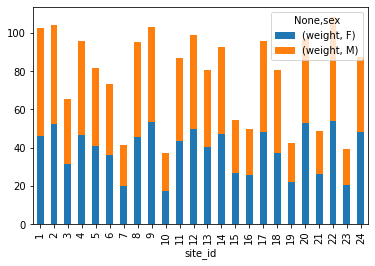

In [39]:
# Solution extra challenge 2

# selection of the data with isin
stack_selection = surveys_df[(surveys_df['sex'].isin(['M', 'F'])) &
							surveys_df["weight"] > 0.][["sex", "weight", "site_id"]]

# calculate the mean weight for each site id and sex combination:
stack_selection = stack_selection.groupby(["site_id", "sex"]).mean().unstack()

# Plot inside jupyter notebook
%matplotlib inline

# and we can make a stacked bar plot from this:
stack_selection.plot(kind='bar', stacked=True)